### Create a Feedback Pipeline Using Azure ML Designer

In this lab you will use AML designer to create a simple feedback pipeline, comparing our predictions to the ground truth data. The designer presents a low code or no code format to create and execute Jobs and Pipelines in Azure Machine Learning Studio  

To start, register the custom _Compute Metrics_ component to the AML workspace.

In [ ]:
from azure.ai.ml import MLClient, load_component
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv, find_dotenv
import os
import pandas as pd

In [ ]:
# Initialize ML Client
load_dotenv(find_dotenv(), override=True)

# authenticate
credential = DefaultAzureCredential(tenantid=os.environ.get('TENANT_ID'))

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id = os.environ.get('SUBSCRIPTION_ID'),
    resource_group_name = os.environ.get('RESOURCE_GROUP_NAME'),
    workspace_name = os.environ.get('WORKSPACE_NAME'),
)

In [ ]:
# Load compute_metrics component
compute_metrics = load_component(source="../src/components/compute_metrics/compute_metrics.yaml")

# Register Component to workspace
ml_client.components.create_or_update(compute_metrics, version="1.0.0")

Next, navigate to the 'Designer' in the Azure Machine Learning studio. Drag and drop the Data and the 'Compute Ground Truth Metrics' components onto the canvas. Like so:

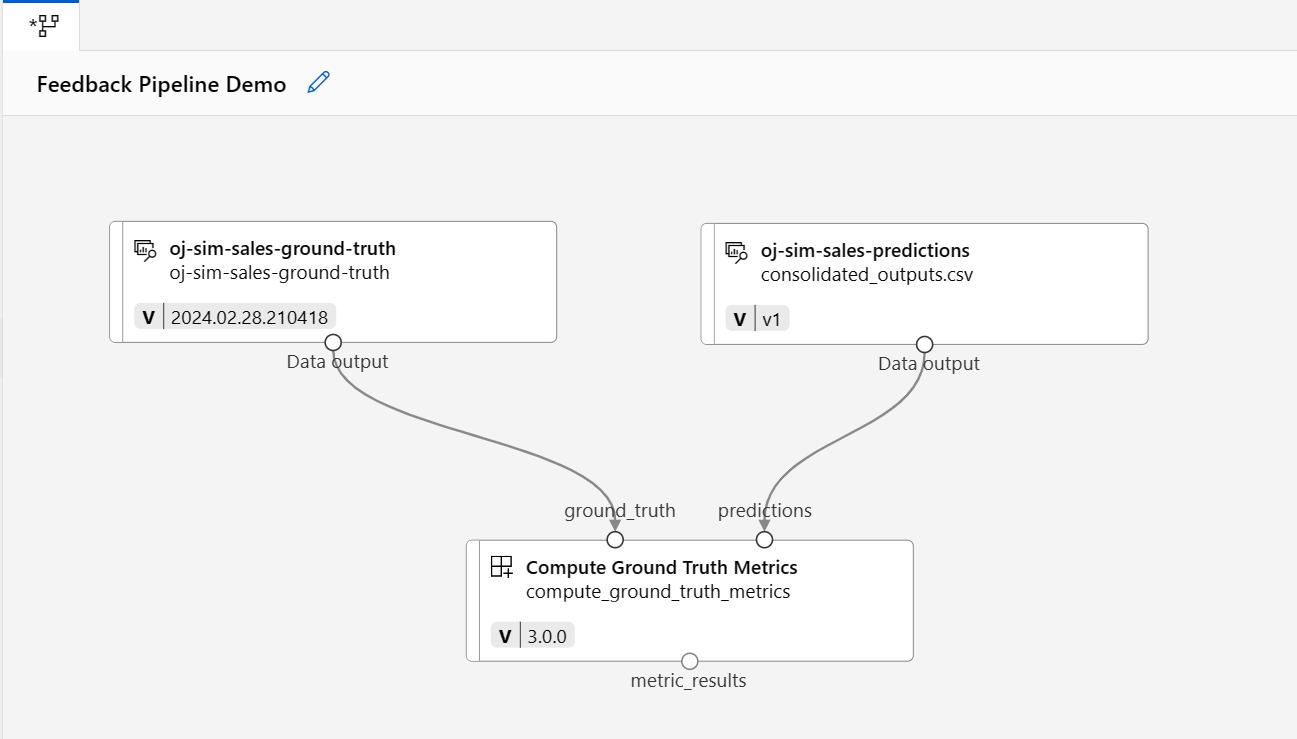

Configure the _Compute Ground Truth Metrics Node_ with the required inputs and outputs:

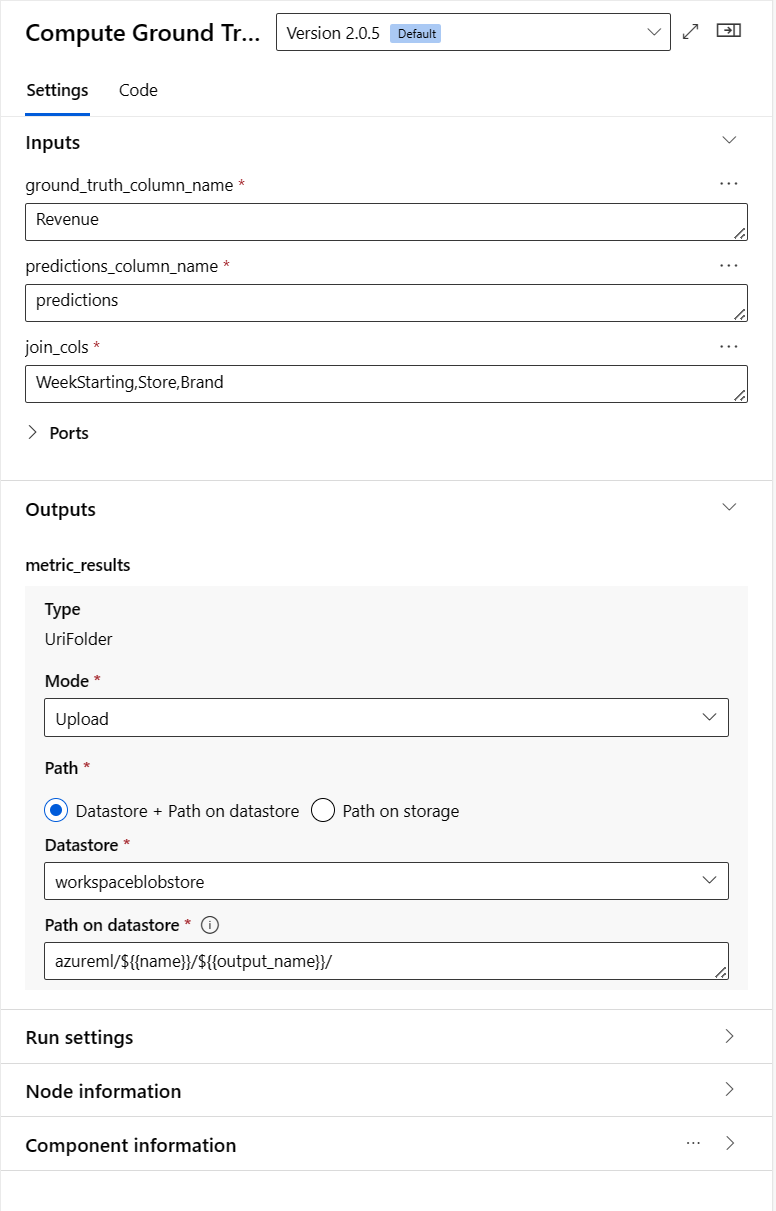

Finally, submit the job via the portal

### Analyze Results

Copy the data asset URI from the job output data asset link and paste into the cell below  
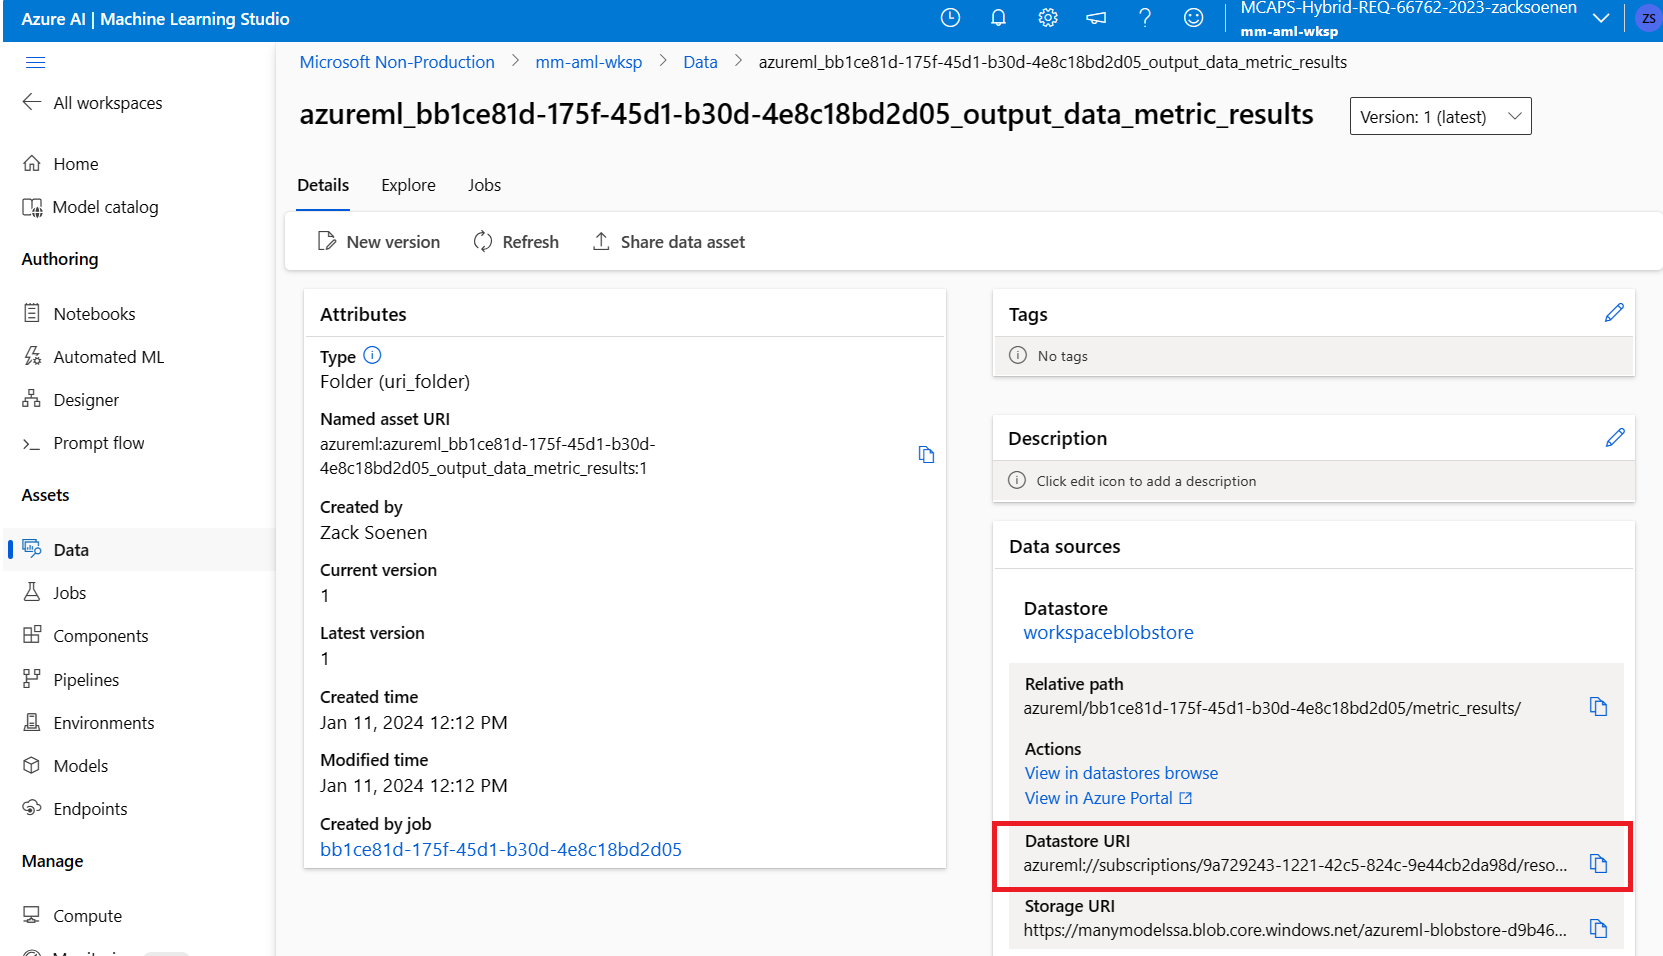

In [ ]:
# output_uri = <PASTE LINK HERE>
# **SAMPLE FORMAT** output_uri = "azureml://subscriptions/########-####-####-####-#######/resourcegroups/resource-group/workspaces/workspace/datastores/workspaceblobstore/paths/azureml/########-#####-####-####-############/metric_results/"

metrics_df = pd.read_csv(output_uri + "metrics.csv")

In [ ]:
# Find the Brand/Store with the worst performance

metrics_df.sort_values(by=['rmse'], ascending=False, inplace=True)
metrics_df.head(1)